In [1]:
using Printf, PyPlot, DelimitedFiles;
using Revise;
using MDToolbox;
PyPlot.plt.style.use("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/Pcs5V/src/Revise.jl:1217
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


### Potential energy function and its gradients

In [2]:
V(x; k=1.0) = sum(- (1.0 / 2.0) .* k .* x.^2 .+ (1.0 ./ 4.0) .* k .* x.^4)
V([0.0])

0.0

In [3]:
grad(x; k= 1.0) =  - k .* x .+ k .* x.^3

grad (generic function with 1 method)

### Molecular dynamics

In [4]:
nstep = 20000;
temperature = 0.01;

x = [0.0]

io = open("single.dat", "w")

x = propagate_md(grad, x, temperature, nstep=nstep, io=io);

close(io)

### Trajectory analysis

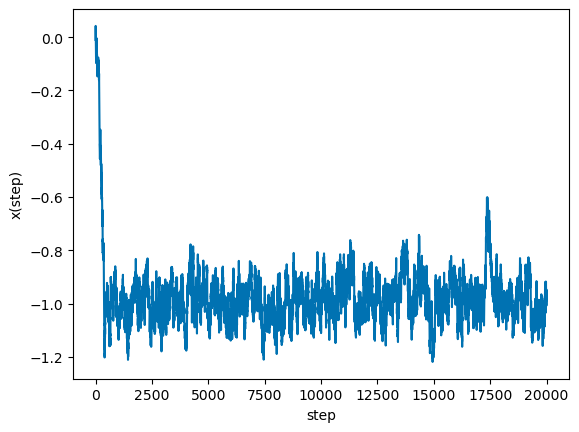

PyObject Text(24.000000000000007, 0.5, 'x(step)')

In [5]:
data = readdlm("single.dat");
traj_temp = data[:, 1]
traj = data[:, 2]

plot(traj)
xlabel("step")
ylabel("x(step)")

In [6]:
x_grid = range(-1.3, 1.3, length=100);
pmf_theory = V.(x_grid, k=1) ./ temperature[1]
pmf_theory .= pmf_theory .- minimum(pmf_theory);

In [7]:
pmf_observed, _ = getpmf(traj, grid_x = collect(x_grid), bandwidth=0.05);

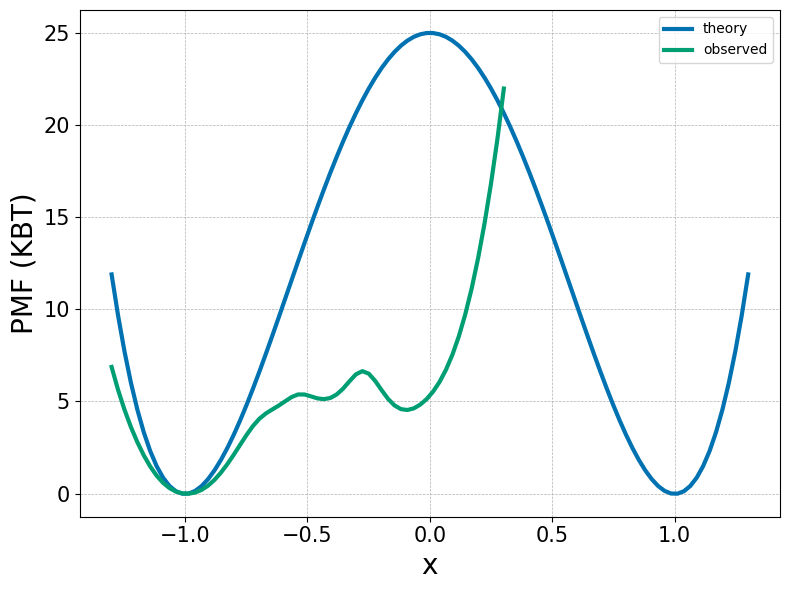

In [9]:
fig, ax = subplots(figsize=(8, 6))
ax.plot(x_grid, pmf_theory, linewidth=3)
xlabel("x",fontsize=20)
ylabel("PMF (KBT)",fontsize=20)

ax.plot(x_grid, pmf_observed, linewidth=3)

ax.legend(["theory", "observed"])

ax.xaxis.set_tick_params(which="major",labelsize=15)
ax.yaxis.set_tick_params(which="major",labelsize=15)
ax.grid(linestyle="--", linewidth=0.5)
tight_layout()
savefig("md_single.png", dpi=350)